In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, preprocessing, linear_model, metrics, pipeline
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

In [10]:
#read data 
y_vals = pd.read_table("CancerTypes_y.txt", sep="\t",header=None)
x_vals_rna = pd.read_table("RNAseq_processed.txt", sep="\t",header=0)
x_vals_cnv = pd.read_table("CNV_processed.txt", sep="\t",header=0)
x_vals_rna = x_vals_rna.ix[:,1:]
x_vals_cnv = x_vals_cnv.ix[:,1:]
#merge_cnv_rna =pd.concat(x_vals_cnv,x_vals_rna)
print(x_vals_cnv.shape)
print(x_vals_rna.shape)
# transpose
x_vals_rna  = x_vals_rna.transpose()
x_vals_cnv  = x_vals_cnv.transpose()
print(x_vals_cnv.shape)
print(x_vals_rna.shape)

(26094, 668)
(26094, 668)
(668, 26094)
(668, 26094)


In [15]:
#Visualise
rand_col_idx = np.random.choice(len(x_vals_rna), size = 30, replace = False)
rand_row_idx = np.random.choice(x_vals_rna.shape[1], size = 300, replace = False)

(668, 30)


<IPython.core.display.Javascript object>


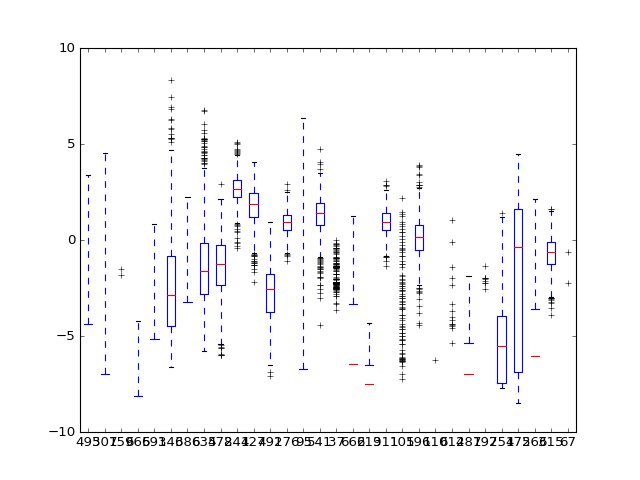

<IPython.core.display.Javascript object>


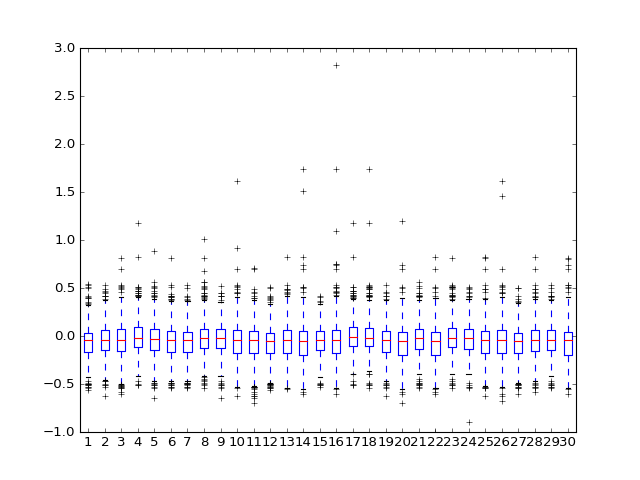

In [103]:
#Visualise
print(x_vals_rna[rand_col_idx].shape)
f1=np.log2(x_vals_rna[rand_col_idx]).plot(kind="box")
f2=x_vals_cnv[rand_col_idx].plot(kind="box")
plt.show()

In [40]:
# impute missing value and standard scale
from sklearn.preprocessing import Imputer 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
data_preprocess = pipeline.Pipeline([
        ('imputer', Imputer(strategy = "median")),
        ('std_scaler', preprocessing.StandardScaler()),
    ])

x_vals_rna_processed = data_preprocess.fit_transform(x_vals_rna)
x_vals_cnv_processed = data_preprocess.fit_transform(x_vals_cnv)


<IPython.core.display.Javascript object>


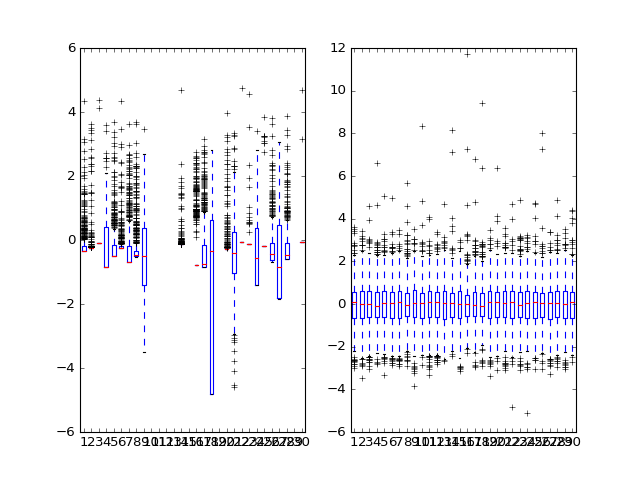

/Users/quan.nguyen/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [119]:
%matplotlib notebook
#see random 38 genes in 668 people  
fig2, (ax3, ax4) = plt.subplots(1,2)
ax3.boxplot(np.log2(x_vals_rna_processed[:,rand_col_idx]+1))
ax4.boxplot(x_vals_cnv_processed[:,rand_col_idx])
plt.show()

In [122]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split
x_cnv_train, x_cnv_test, y_cnv_train, y_cnv_test = train_test_split(x_vals_cnv_processed, y_vals.values.flatten(), test_size = 0.25, random_state = 0)
x_rna_train, x_rna_test, y_rna_train, y_rna_test = train_test_split(x_vals_rna_processed, y_vals.values.flatten(), test_size = 0.25, random_state = 0)


In [143]:
x_cnv_train.shape

(501, 26094)

In [139]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 512, activation=tf.nn.relu, kernel_initializer = "uniform"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 10, activation="sigmoid", kernel_initializer = "uniform")
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

rna_fit = model.fit(x_rna_train, y_rna_train, epochs=100)
rna_evaluate = model.evaluate(x_rna_test, y_rna_test)

Epoch 1/100
501/501 [==============================] - 4s 9ms/step - loss: 2.3006 - acc: 0.7206
Epoch 2/100
501/501 [==============================] - 4s 8ms/step - loss: 2.2933 - acc: 0.7246
Epoch 3/100
501/501 [==============================] - 4s 7ms/step - loss: 2.2872 - acc: 0.7226
Epoch 4/100
501/501 [==============================] - 4s 9ms/step - loss: 2.2809 - acc: 0.7226
Epoch 5/100
501/501 [==============================] - 4s 8ms/step - loss: 2.2744 - acc: 0.7226
Epoch 6/100
501/501 [==============================] - 4s 8ms/step - loss: 2.2684 - acc: 0.7246
Epoch 7/100
501/501 [==============================] - 4s 8ms/step - loss: 2.2623 - acc: 0.7246
Epoch 8/100
501/501 [==============================] - 4s 8ms/step - loss: 2.2563 - acc: 0.7246
Epoch 9/100
501/501 [==============================] - 4s 8ms/step - loss: 2.2501 - acc: 0.7246
Epoch 10/100
501/501 [==============================] - 4s 8ms/step - loss: 2.2441 - acc: 0.7246
Epoch 11/100
501/501 [=================

In [150]:
rna_fit.history['acc']

[0.72055888259244294,
 0.72455089915536364,
 0.72654690690145285,
 0.72654690713939551,
 0.72654690702042413]

In [142]:
print("Mean accuracy: ", np.mean(rna_fit.history['acc']))

Mean accuracy:  0.724790419826


<IPython.core.display.Javascript object>


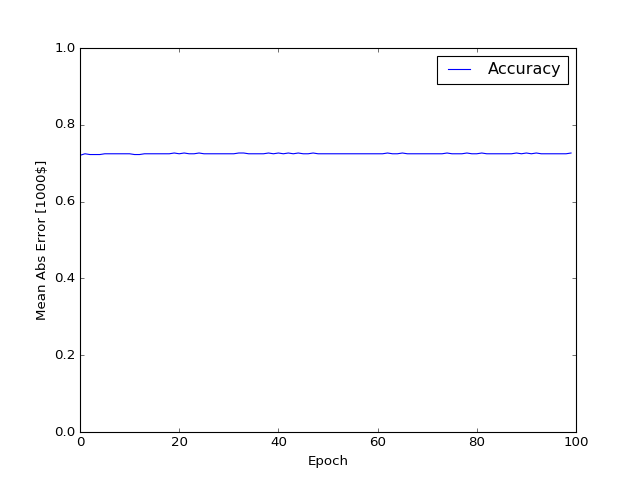

In [141]:

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Accuracy')
# plt.plot(history.epoch, np.array(history.history['loss']),
#          label = 'Val loss')
  plt.legend()
  plt.ylim([0, 1])

plot_history(rna_fit)

In [159]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units = 501, activation="relu", kernel_initializer = "uniform"),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units = 501, activation="sigmoid", kernel_initializer = "uniform")
])
model.compile(optimizer='adam',
              loss= "categorical_crossentropy",#'binary_crossentropy',
              metrics=['accuracy'])

rna_fit = model.fit(x_rna_train, y_rna_train, epochs=5)
rna_evaluate = model.evaluate(x_rna_test, y_rna_test)

ValueError: Error when checking target: expected dense_28 to have shape (501,) but got array with shape (1,)